# Install all necessary packages

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bing-image-downloader

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install tensorflow

In [5]:
## import random stuff 

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image

import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

In [7]:
import os
os.sys.path

['/home/gaia/my_project_dir',
 '/home/gaia/anaconda3/lib/python37.zip',
 '/home/gaia/anaconda3/lib/python3.7',
 '/home/gaia/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/gaia/anaconda3/lib/python3.7/site-packages',
 '/home/gaia/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/gaia/.ipython']

In [8]:
## import two dataset from bing (I manually put them in the right directory after that, so we can fix this eventually)

In [9]:
##(also not copied from the tutorial)

In [10]:
#from bing_image_downloader import downloader
#downloader.download('gold grape fruit', limit=100,  output_dir='grapefruit', adult_filter_off=True, force_replace=False, timeout=60)

In [11]:
#from bing_image_downloader import downloader
#downloader.download('lemon picture', limit=100,  output_dir='lemon', 
#adult_filter_off=True, force_replace=False, timeout=60)

In [12]:
## create a train a validation set (also not taken from the tutorial but from stackoverflow)

In [13]:
img_height = 64
img_width = 64
batch_size = 3
path = "/home/gaia/my_project_dir/dataset2"

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    path, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

#model.fit_generator(
 #   train_generator,
  #  steps_per_epoch = train_generator.samples // batch_size,
   # validation_data = validation_generator, 
    #validation_steps = validation_generator.samples // batch_size,
    #epochs = nb_epochs)

Found 271 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [14]:
## create a model

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3),activation='relu',input_shape = (img_height, img_width, batch_size)), tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3),activation='relu',input_shape = (img_height, img_width, batch_size)), tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3),activation='relu',input_shape = (img_height, img_width, batch_size)), tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [16]:
## compile our model. Since there are two classes, we have used loss = ‘binary_crossentropy’.

In [17]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
         metrics =['accuracy'] )

In [18]:
## train the model

In [19]:
model_fit = model.fit(train_generator,
                     epochs = 30,
                     validation_data = validation_generator)

Epoch 1/30
91/91 [==============================] - 2s 20ms/step - loss: 0.7118 - accuracy: 0.5230 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30
91/91 [==============================] - 2s 17ms/step - loss: 0.6928 - accuracy: 0.5228 - val_loss: 0.6553 - val_accuracy: 0.6667
Epoch 3/30
91/91 [==============================] - 2s 19ms/step - loss: 0.6588 - accuracy: 0.5764 - val_loss: 0.5843 - val_accuracy: 0.7727
Epoch 4/30
91/91 [==============================] - 2s 19ms/step - loss: 0.6275 - accuracy: 0.6625 - val_loss: 0.5711 - val_accuracy: 0.7879
Epoch 5/30
91/91 [==============================] - 2s 17ms/step - loss: 0.5992 - accuracy: 0.7080 - val_loss: 0.5755 - val_accuracy: 0.7576
Epoch 6/30
91/91 [==============================] - 2s 17ms/step - loss: 0.5963 - accuracy: 0.7125 - val_loss: 0.5224 - val_accuracy: 0.7727
Epoch 7/30
91/91 [==============================] - 2s 17ms/step - loss: 0.5341 - accuracy: 0.7505 - val_loss: 0.5968 - val_accuracy: 0.7424
Epoch 8/30
91

91/91 - 1s - loss: 0.1339 - accuracy: 0.9483


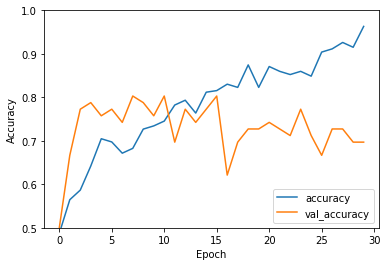

In [20]:
history = model_fit
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_generator, verbose=2)

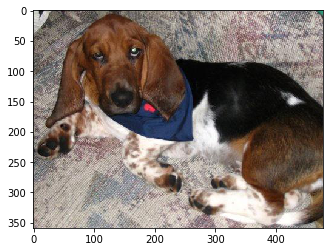

basset


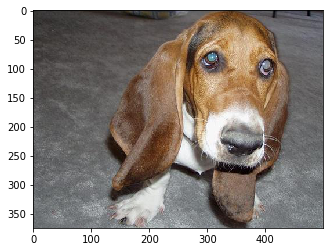

terrier


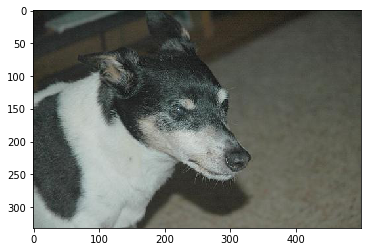

terrier


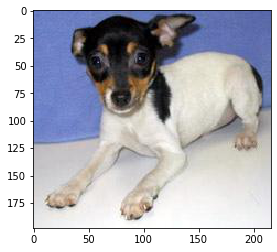

terrier


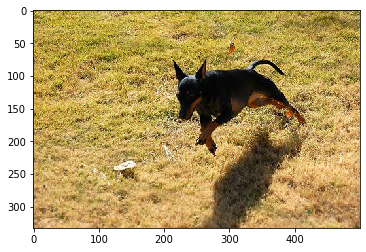

terrier


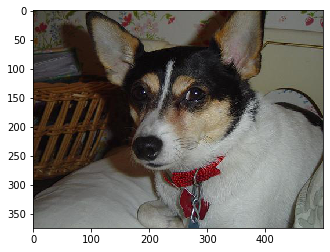

terrier


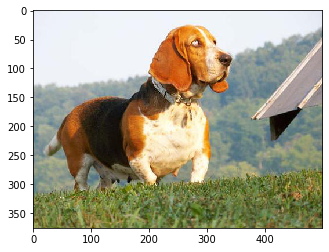

terrier


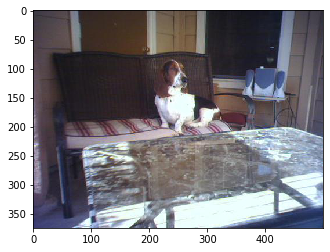

terrier


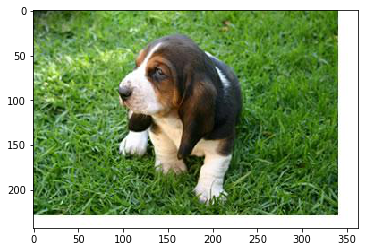

terrier


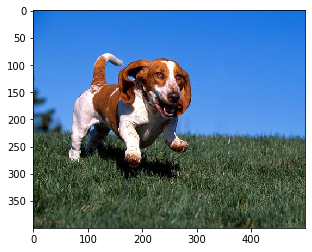

basset


In [21]:
dir_path = '/home/gaia/my_project_dir/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i)#, target_size = (64,64))
    plt.imshow(img)
    plt.show()
    img_pred = image.load_img(dir_path+'//'+i, target_size = (64,64))
    img_pred = image.img_to_array(img_pred)
    img_pred = np.expand_dims(img_pred, axis = 0)
    val = model.predict(img_pred)
    images = np.vstack([img_pred])
    val = model.predict(images)
    if val == 0:
        print('basset')
    else:
        print('terrier')
        

In [117]:
###second try https://www.tensorflow.org/tutorials/images/cnn


In [118]:
from tensorflow.keras import datasets, layers, models

In [119]:
img_height = 64
img_width = 64
batch_size = 3
path = "/home/gaia/my_project_dir/dataset2"

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    path, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

#model.fit_generator(
 #   train_generator,
  #  steps_per_epoch = train_generator.samples // batch_size,
   # validation_data = validation_generator, 
    #validation_steps = validation_generator.samples // batch_size,
    #epochs = nb_epochs)

Found 271 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [120]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [121]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [122]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [123]:
model_fit = model.fit(train_generator,
                     epochs = 30,
                     validation_data = validation_generator)

Epoch 1/30
91/91 [==============================] - 4s 43ms/step - loss: 0.8943 - accuracy: 0.5356 - val_loss: 0.7003 - val_accuracy: 0.6970
Epoch 2/30
91/91 [==============================] - 3s 38ms/step - loss: 0.7084 - accuracy: 0.5405 - val_loss: 0.6735 - val_accuracy: 0.5303
Epoch 3/30
91/91 [==============================] - 3s 33ms/step - loss: 0.6996 - accuracy: 0.5074 - val_loss: 0.5690 - val_accuracy: 0.6818
Epoch 4/30
91/91 [==============================] - 3s 33ms/step - loss: 0.6311 - accuracy: 0.6440 - val_loss: 0.5688 - val_accuracy: 0.6970
Epoch 5/30
91/91 [==============================] - 3s 34ms/step - loss: 0.5922 - accuracy: 0.7030 - val_loss: 0.4653 - val_accuracy: 0.8030
Epoch 6/30
91/91 [==============================] - 3s 33ms/step - loss: 0.5480 - accuracy: 0.7262 - val_loss: 0.6810 - val_accuracy: 0.5606
Epoch 7/30
91/91 [==============================] - 3s 33ms/step - loss: 0.6024 - accuracy: 0.6723 - val_loss: 0.7395 - val_accuracy: 0.5455
Epoch 8/30
91

91/91 - 2s - loss: 0.2017 - accuracy: 0.9225


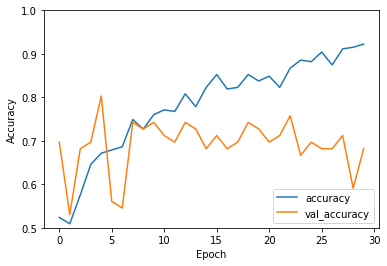

In [124]:
history = model_fit
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_generator, verbose=2)

In [125]:
## print stuff other way around????

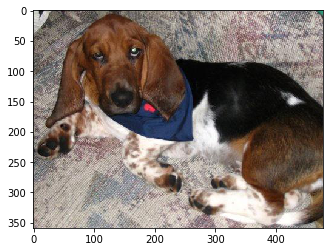

This image most likely belongs to terrier with a 100.00 percent confidence.


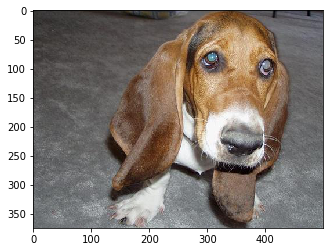

This image most likely belongs to terrier with a 100.00 percent confidence.


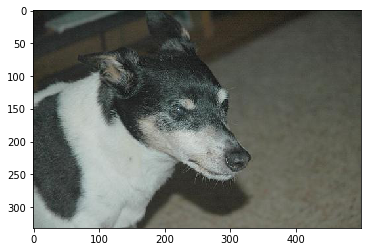

This image most likely belongs to basset with a 100.00 percent confidence.


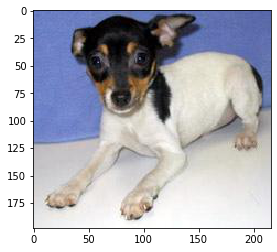

This image most likely belongs to basset with a 100.00 percent confidence.


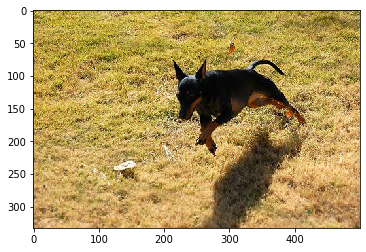

This image most likely belongs to basset with a 100.00 percent confidence.


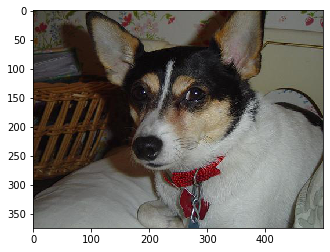

This image most likely belongs to terrier with a 100.00 percent confidence.


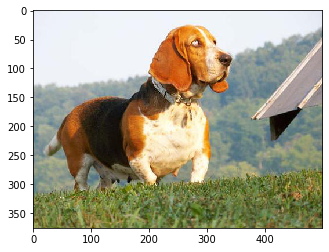

This image most likely belongs to terrier with a 100.00 percent confidence.


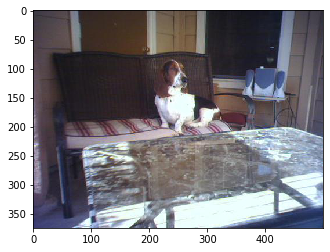

This image most likely belongs to basset with a 100.00 percent confidence.


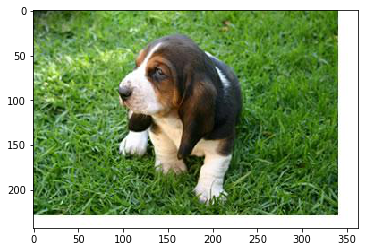

This image most likely belongs to terrier with a 100.00 percent confidence.


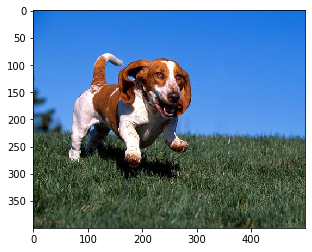

This image most likely belongs to terrier with a 100.00 percent confidence.


In [127]:
dir_path = '/home/gaia/my_project_dir/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i)#, target_size = (64,64))
    plt.imshow(img)
    plt.show()
    img_pred = image.load_img(dir_path+'//'+i, target_size = (64,64))
    img_pred = image.img_to_array(img_pred)
    img_pred = tf.expand_dims(img_pred, 0) # Create a batch

    predictions = model.predict(img_pred)
    score = tf.nn.softmax(predictions[0])
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))